In [1]:
# import the necessary packages
%matplotlib inline 
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from matplotlib import pyplot as plt
import random

In [2]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
imagePath = "image/my_o.jpg"
height = width = 1000

image = cv2.imread(imagePath)
image = cv2.resize(image,(height,width))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

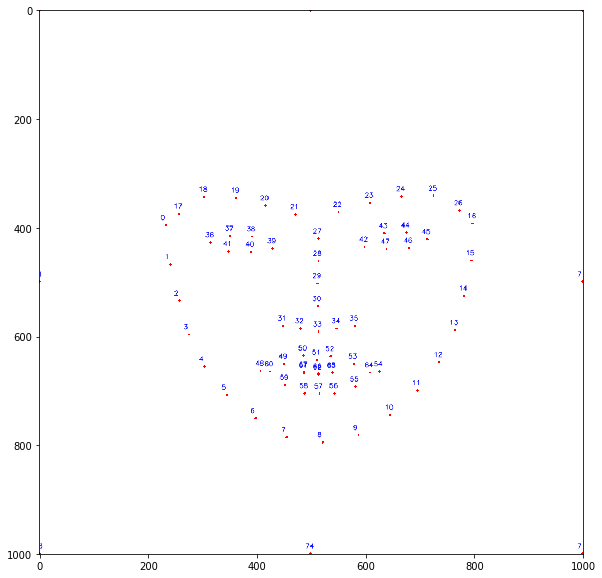

In [4]:
# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        imgmax = np.zeros([1000,1000,3],dtype=np.uint8)
        imgmax.fill(255)
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        shape=np.append(shape,[[0, 0]],axis=0)
        shape=np.append(shape,[[int(width/2-1), 0]],axis=0)
        shape=np.append(shape,[[width-1, 0]],axis=0)
        shape=np.append(shape,[[0, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[width-1, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[0, height-1]],axis=0)
        shape=np.append(shape,[[int(width/2-1),height-1]],axis=0)
        shape=np.append(shape,[[width-1, height-1]],axis=0)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        # use to show result from detector
        count=0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for (x, y) in shape:
            cv2.circle(imgmax, (x, y), 2, (0, 0, 255), -1)
            cv2.putText(imgmax,'%d' % count,(x-10,y-10), font, 0.4,(255,0,0),1,cv2.LINE_AA)
            count=count+1
            
        
 
# show the output image with the face detections + facial landmarks
np.save("detectedmark.npy", shape)
cv2.imwrite("output/my_o_w_f.jpg",imgmax)
plt.figure(figsize=(10,10))
plt.imshow(imgmax[:,:,(2,1,0)]/255)

Read in the points from shape
insert point
Draw delaunay triangles
[[ 3000.     0.     0.  3000.   999.   999.]
 [    0.  3000.  3000.     0. -3000. -3000.]
 [    0.  3000. -3000. -3000.     0.   999.]
 [-3000. -3000.  3000.     0.   999.     0.]
 [  499.     0.   295.   364.     0.     0.]
 [  295.   364.   499.     0.   491.   347.]
 [  294.   453.     0.   499.   295.   364.]
 [    0.   499.   294.   453.   297.   551.]
 [  295.   364.     0.   499.     0.     0.]
 [  754.   689.   711.   623.   750.   631.]
 [  711.   623.   754.   689.   693.   703.]
 [    0.     0.     0.   499. -3000. -3000.]
 [  294.   453.   295.   364.   491.   347.]
 [  314.   649.   545.   434.   615.   714.]
 [  545.   434.   314.   649.   297.   551.]
 [    0.   499.   297.   551.   314.   649.]
 [  297.   551.   294.   453.   545.   434.]
 [  679.   762.   693.   703.   743.   729.]
 [  693.   703.   679.   762.   636.   719.]
 [  314.   649.     0.   999.     0.   499.]
 [    0.   999.   314.   649.   3

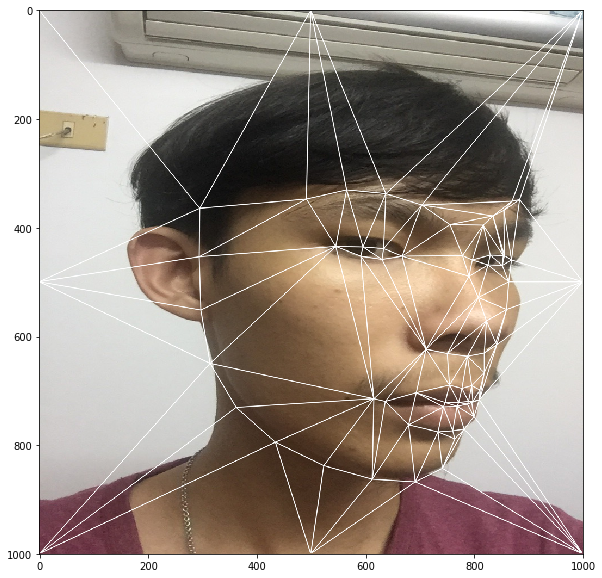

In [15]:
# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True
 
# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )
 
 
# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color ) :
    triangleList = subdiv.getTriangleList();
    r = (0, 0, size[1], size[0])
    delaunayTri = []
    for t in triangleList :
        pt = []
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
         
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)
            ind = []
            for j in range(0, 3):
                for k in range(0, len(points)):
                    if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
                        ind.append(k)
            if len(ind) == 3:
                delaunayTri.append((ind[0], ind[1], ind[2]))
    
    return delaunayTri

# Draw delaunay triangles for another image
def draw_new(img, shape, delaunay_color, dest ) :
    for t in dest :
        pt1 = (shape[t[0]][0],shape[t[0]][1])
        pt2 = (shape[t[1]][0],shape[t[1]][1])
        pt3 = (shape[t[2]][0],shape[t[2]][1])
        
        cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)
    
 
# Draw voronoi diagram
def draw_voronoi(img, subdiv) :
 
    ( facets, centers) = subdiv.getVoronoiFacetList([])
 
    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
         
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
 
        cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), cv2.FILLED, cv2.LINE_AA, 0)
 
 
 
# Define window names
win_delaunay = "Delaunay Triangulation"
win_voronoi = "Voronoi Diagram"

# Read in the image.
img = cv2.imread(imagePath);
img = cv2.resize(img,(height,width))

# Rectangle to be used with Subdiv2D
size = img.shape
rect = (0, 0, size[1], size[0])

# Create an instance of Subdiv2D
subdiv = cv2.Subdiv2D(rect)

# Create an array of points.
points = [];

# Read in the points from shape
print('Read in the points from shape')
for (x, y) in shape:
    points.append((int(x),int(y)))

# Insert points into subdiv
print('insert point')
for p in points :
    subdiv.insert(p)

# Draw delaunay triangles
print('Draw delaunay triangles')
dd = draw_delaunay( img, subdiv, (255, 255, 255) );

print(subdiv.getTriangleList())

# Show results
print('Show results')
cv2.imwrite("output/my_o_tri_f.jpg",img)
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,(2,1,0)]/255)

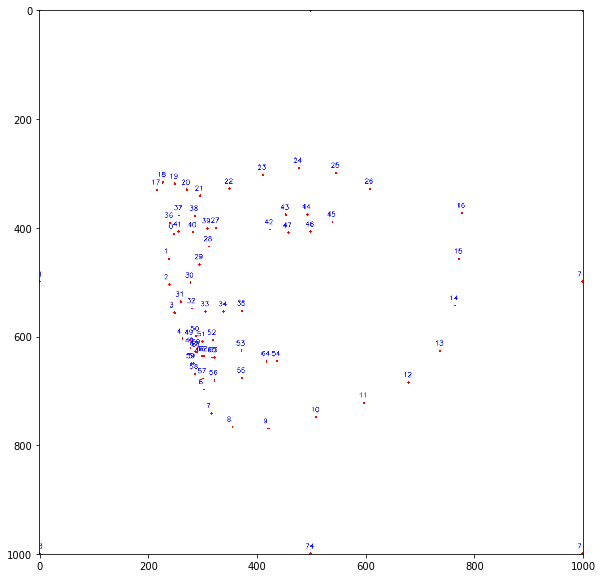

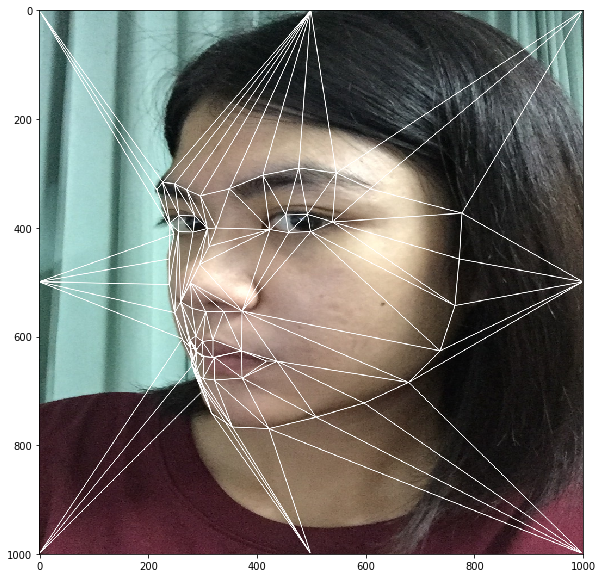

In [6]:
imagePath = "image/my_r.jpg"
height = width = 1000

image = cv2.imread(imagePath)
image = cv2.resize(image,(height,width))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        imgmax = np.zeros([1000,1000,3],dtype=np.uint8)
        imgmax.fill(255)
        
        shape1 = predictor(gray, rect)
        shape1 = face_utils.shape_to_np(shape1)
        shape1 = np.append(shape1,[[0, 0]],axis=0)
        shape1 =np.append(shape1,[[int(width/2-1), 0]],axis=0)
        shape1=np.append(shape1,[[width-1, 0]],axis=0)
        shape1=np.append(shape1,[[0, int(height/2-1)]],axis=0)
        shape1=np.append(shape1,[[width-1, int(height/2-1)]],axis=0)
        shape1=np.append(shape1,[[0, height-1]],axis=0)
        shape1=np.append(shape1,[[int(width/2-1),height-1]],axis=0)
        shape1=np.append(shape1,[[width-1, height-1]],axis=0)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        # use to show result from detector
        count=0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for (x, y) in shape1:
            cv2.circle(imgmax, (x, y), 2, (0, 0, 255), -1)
            cv2.putText(imgmax,'%d' % count,(x-10,y-10), font, 0.4,(255,0,0),1,cv2.LINE_AA)
            count=count+1
            
        
 
# show the output image with the face detections + facial landmarks
np.save("detectedmark.npy", shape1)
cv2.imwrite("output/my_r_w.jpg",imgmax)
plt.figure(figsize=(10,10))
plt.imshow(imgmax[:,:,(2,1,0)]/255)
img = cv2.imread(imagePath);
img = cv2.resize(img,(height,width))
draw_new( img, shape1, (255, 255, 255) ,dd)
cv2.imwrite("output/my_r_tri.jpg",img)
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,(2,1,0)]/255)

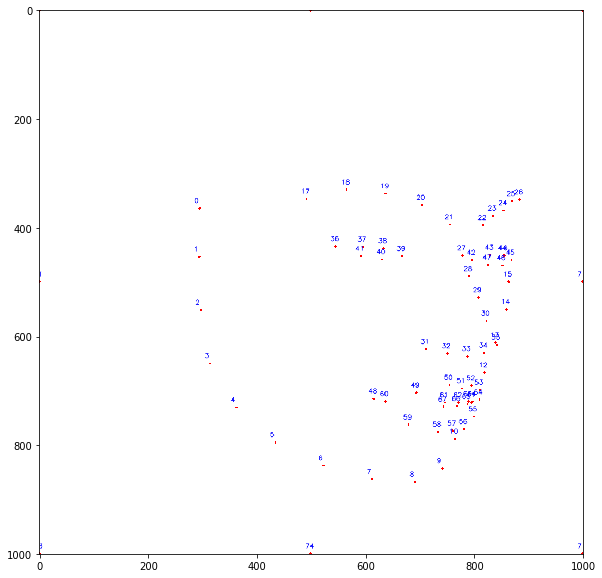

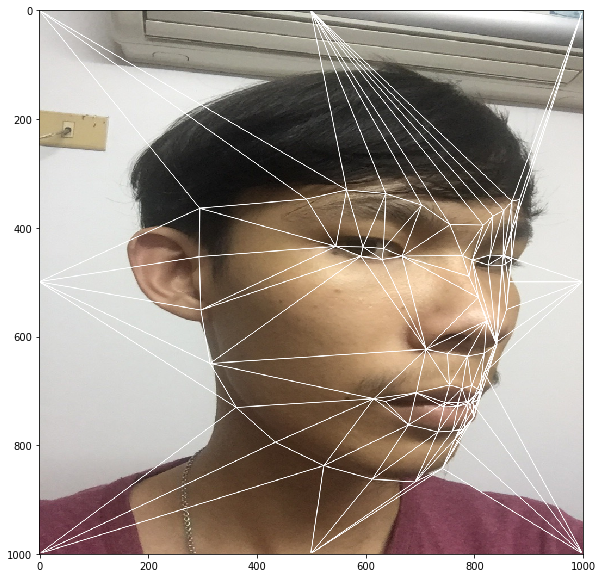

In [8]:
imagePath = "image/nick_l.jpg"
height = width = 1000

image = cv2.imread(imagePath)
image = cv2.resize(image,(height,width))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        imgmax = np.zeros([1000,1000,3],dtype=np.uint8)
        imgmax.fill(255)
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        shape=np.append(shape,[[0, 0]],axis=0)
        shape=np.append(shape,[[int(width/2-1), 0]],axis=0)
        shape=np.append(shape,[[width-1, 0]],axis=0)
        shape=np.append(shape,[[0, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[width-1, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[0, height-1]],axis=0)
        shape=np.append(shape,[[int(width/2-1),height-1]],axis=0)
        shape=np.append(shape,[[width-1, height-1]],axis=0)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        # use to show result from detector
        count=0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for (x, y) in shape:
            cv2.circle(imgmax, (x, y), 2, (0, 0, 255), -1)
            cv2.putText(imgmax,'%d' % count,(x-10,y-10), font, 0.4,(255,0,0),1,cv2.LINE_AA)
            count=count+1
            
        
 
# show the output image with the face detections + facial landmarks
np.save("detectedmark.npy", shape)
cv2.imwrite("output/my_l_w.jpg",imgmax)
plt.figure(figsize=(10,10))
plt.imshow(imgmax[:,:,(2,1,0)]/255)
img = cv2.imread(imagePath);
img = cv2.resize(img,(height,width))
draw_new( img, shape, (255, 255, 255) ,dd)
cv2.imwrite("output/my_l_tri.jpg",img)
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,(2,1,0)]/255)

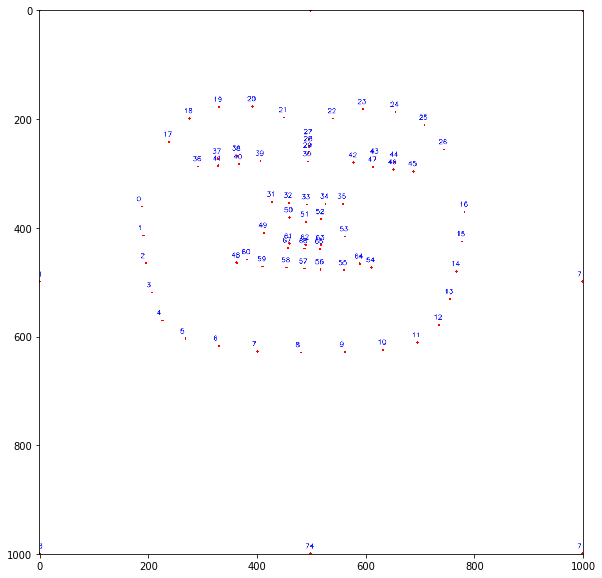

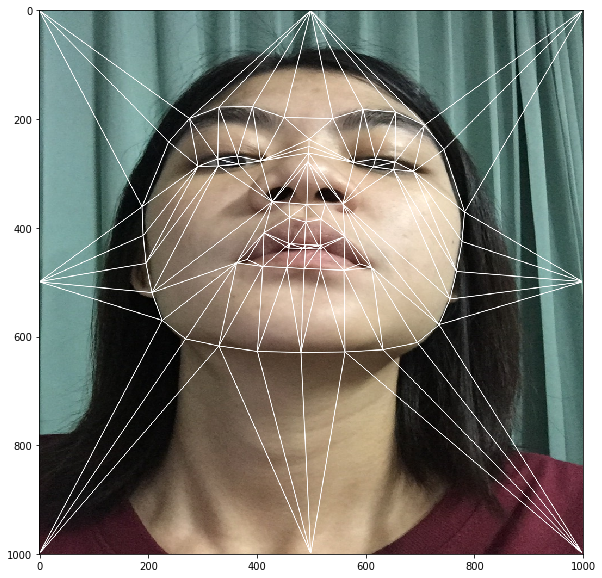

In [19]:
imagePath = "image/my_t.jpg"
height = width = 1000

image = cv2.imread(imagePath)
image = cv2.resize(image,(height,width))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        imgmax = np.zeros([1000,1000,3],dtype=np.uint8)
        imgmax.fill(255)
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        shape=np.append(shape,[[0, 0]],axis=0)
        shape=np.append(shape,[[int(width/2-1), 0]],axis=0)
        shape=np.append(shape,[[width-1, 0]],axis=0)
        shape=np.append(shape,[[0, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[width-1, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[0, height-1]],axis=0)
        shape=np.append(shape,[[int(width/2-1),height-1]],axis=0)
        shape=np.append(shape,[[width-1, height-1]],axis=0)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        # use to show result from detector
        count=0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for (x, y) in shape:
            cv2.circle(imgmax, (x, y), 2, (0, 0, 255), -1)
            cv2.putText(imgmax,'%d' % count,(x-10,y-10), font, 0.4,(255,0,0),1,cv2.LINE_AA)
            count=count+1
            
        
 
# show the output image with the face detections + facial landmarks
np.save("detectedmark.npy", shape)
cv2.imwrite("output/my_t_w.jpg",imgmax)
plt.figure(figsize=(10,10))
plt.imshow(imgmax[:,:,(2,1,0)]/255)
img = cv2.imread(imagePath);
img = cv2.resize(img,(height,width))
draw_new( img, shape, (255, 255, 255) ,dd)
cv2.imwrite("output/my_t_tri.jpg",img)
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,(2,1,0)]/255)

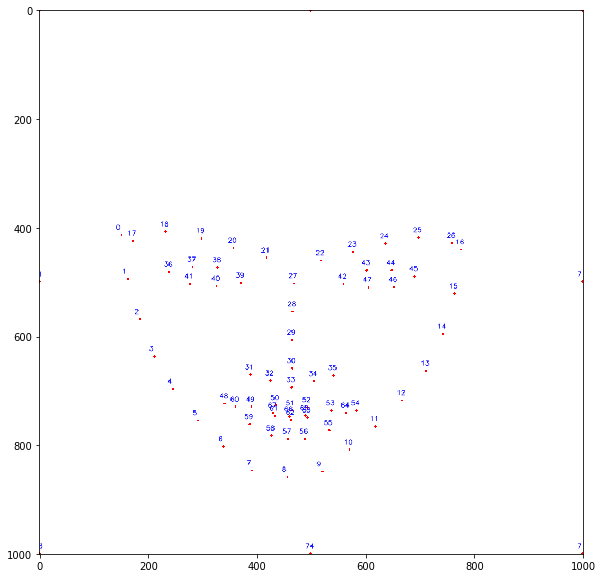

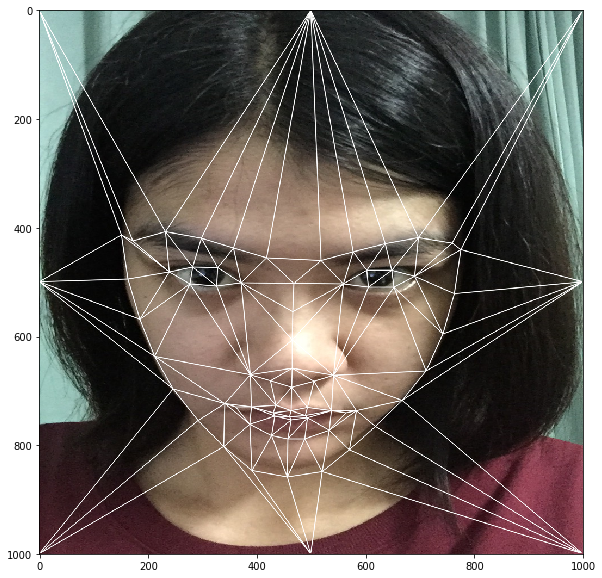

In [20]:
imagePath = "image/my_b.jpg"
height = width = 1000

image = cv2.imread(imagePath)
image = cv2.resize(image,(height,width))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        imgmax = np.zeros([1000,1000,3],dtype=np.uint8)
        imgmax.fill(255)
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        shape=np.append(shape,[[0, 0]],axis=0)
        shape=np.append(shape,[[int(width/2-1), 0]],axis=0)
        shape=np.append(shape,[[width-1, 0]],axis=0)
        shape=np.append(shape,[[0, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[width-1, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[0, height-1]],axis=0)
        shape=np.append(shape,[[int(width/2-1),height-1]],axis=0)
        shape=np.append(shape,[[width-1, height-1]],axis=0)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        # use to show result from detector
        count=0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for (x, y) in shape:
            cv2.circle(imgmax, (x, y), 2, (0, 0, 255), -1)
            cv2.putText(imgmax,'%d' % count,(x-10,y-10), font, 0.4,(255,0,0),1,cv2.LINE_AA)
            count=count+1
            
        
 
# show the output image with the face detections + facial landmarks
np.save("detectedmark.npy", shape)
cv2.imwrite("output/my_b_w.jpg",imgmax)
plt.figure(figsize=(10,10))
plt.imshow(imgmax[:,:,(2,1,0)]/255)
img = cv2.imread(imagePath);
img = cv2.resize(img,(height,width))
draw_new( img, shape, (255, 255, 255) ,dd)
cv2.imwrite("output/my_b_tri.jpg",img)
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,(2,1,0)]/255)

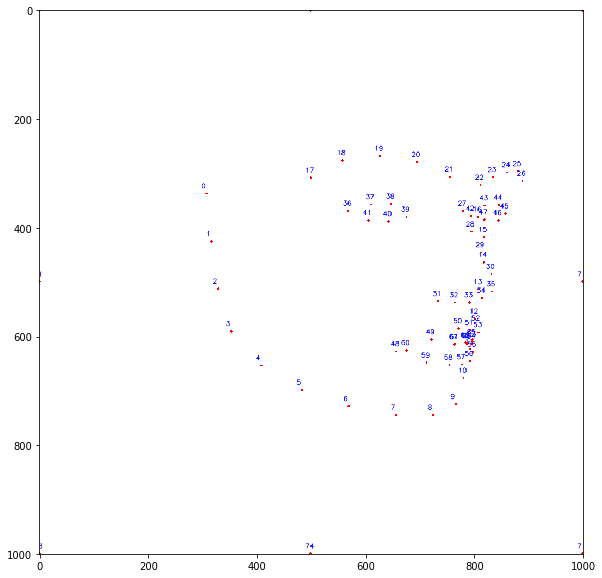

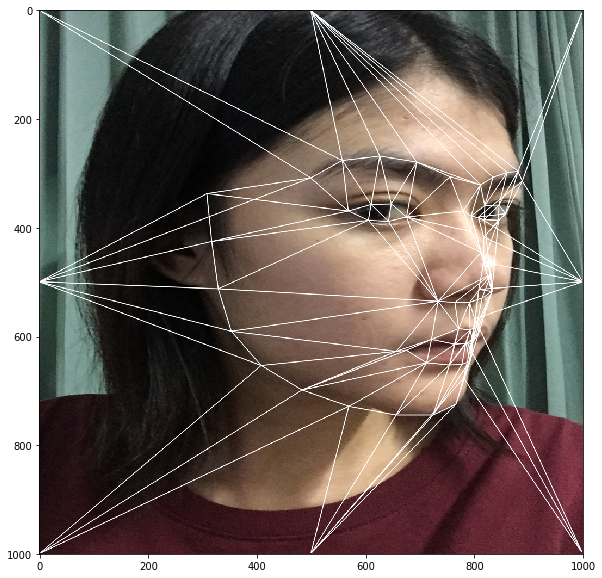

In [6]:
imagePath = "image/my_l.jpg"
height = width = 1000

image = cv2.imread(imagePath)
image = cv2.resize(image,(height,width))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        imgmax = np.zeros([1000,1000,3],dtype=np.uint8)
        imgmax.fill(255)
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        shape=np.append(shape,[[0, 0]],axis=0)
        shape=np.append(shape,[[int(width/2-1), 0]],axis=0)
        shape=np.append(shape,[[width-1, 0]],axis=0)
        shape=np.append(shape,[[0, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[width-1, int(height/2-1)]],axis=0)
        shape=np.append(shape,[[0, height-1]],axis=0)
        shape=np.append(shape,[[int(width/2-1),height-1]],axis=0)
        shape=np.append(shape,[[width-1, height-1]],axis=0)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        # use to show result from detector
        count=0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for (x, y) in shape:
            cv2.circle(imgmax, (x, y), 2, (0, 0, 255), -1)
            cv2.putText(imgmax,'%d' % count,(x-10,y-10), font, 0.4,(255,0,0),1,cv2.LINE_AA)
            count=count+1
            
        
 
# show the output image with the face detections + facial landmarks
np.save("detectedmark.npy", shape)
cv2.imwrite("output/my_l_w.jpg",imgmax)
plt.figure(figsize=(10,10))
plt.imshow(imgmax[:,:,(2,1,0)]/255)
img = cv2.imread(imagePath);
img = cv2.resize(img,(height,width))
draw_new( img, shape, (255, 255, 255) ,dd)
cv2.imwrite("output/my_l_tri.jpg",img)
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,(2,1,0)]/255)

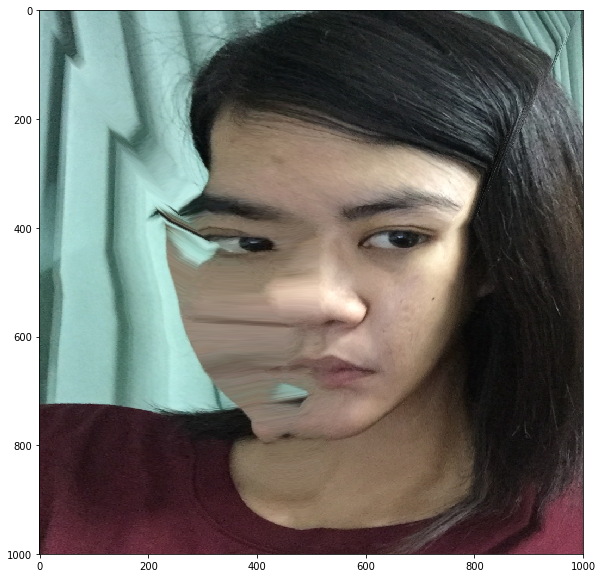

In [7]:
def warpAffineMorphing(img, marker, targetmarker, tri, outputsize=(400,400)):
    if targetmarker.shape != marker.shape: # ตรวจสอบว่ามี Landmark เท่ากัน
        return
    output = np.zeros([outputsize[0],outputsize[1],3], dtype = np.float32) # กำหนดภาพ Output
    totalweight = output # ค่า weight รวม สำหรับเพิ่มความเนียนของภาพกรณีที่สามเหลี่ยมนั้นเหลือมกัน
    
    for t in tri: # t คือ index ของ landmark ประกอบด้วยทั้งสามจุด
        mask = np.zeros(totalweight.shape, dtype = np.float32) # ค่า weight ในแต่ละรอบ
        cv2.fillConvexPoly(mask, targetmarker[t].astype(int), (1,1,1), lineType=cv2.LINE_AA) # เทค่า weight เฉพาะบริเวณสามเหลี่ยมปลายทางในแต่ละรอบ
        
        H = cv2.getAffineTransform(marker[t],targetmarker[t]) # Affine รูป Input มายังสามเหลี่ยมปลายทาง
        output = output + mask * cv2.warpAffine(img, H, outputsize, None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101) 
        # ทาบกับ mark เพื่อตัดเฉพาะบริเวณ mark เท่านั้น
        
        totalweight += mask # เพิ่ม weight ของรอบนี้
    return np.ceil(output/totalweight) # หารผล weight ในแต่ละจุด (แต่ละจุดไม่เท่ากัน)

imagePath = 'image/my_r.jpg'
img = cv2.imread(imagePath);
img = cv2.resize(img,(width,height))
outputsize = (width, height)
faceimg = img
landmarks = shape1
TEMPLATE = shape
triangleWarp = dd
wow =[]
for t in triangleWarp:
    x = list(t)
    wow.append(x)

#print(wow)
triangleWarp=wow
outputimg = warpAffineMorphing(faceimg, 
                               landmarks.astype(np.float32), # Cast ให้เป็น Float32 เพื่อเพิ่มความแม่นยำ
                               TEMPLATE.astype(np.float32),  # Cast ให้เป็น Float32 เพื่อเพิ่มความแม่นยำ
                               triangleWarp, 
                               outputsize)
#print(outputimg)
plt.figure(figsize=(10,10))
plt.imshow(outputimg[:,:,(2,1,0)]/255)  # แสดงภาพ Output พร้อม Convert เป็น RGB

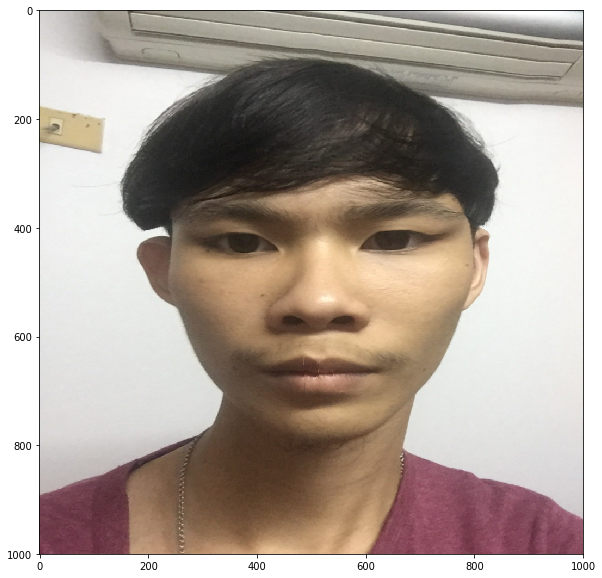

In [11]:
def warpAffineMorphing(img, marker, targetmarker, tri, outputsize):
    if targetmarker.shape != marker.shape: # ตรวจสอบว่ามี Landmark เท่ากัน
        return
    output = np.zeros([outputsize[0],outputsize[1],3], dtype = np.float32) # กำหนดภาพ Output
    totalweight = output # ค่า weight รวม สำหรับเพิ่มความเนียนของภาพกรณีที่สามเหลี่ยมนั้นเหลือมกัน
    
    for t in tri: # t คือ index ของ landmark ประกอบด้วยทั้งสามจุด
        mask = np.zeros(totalweight.shape, dtype = np.float32) # ค่า weight ในแต่ละรอบ
        cv2.fillConvexPoly(mask, targetmarker[t].astype(int), (1,1,1), lineType=cv2.LINE_AA) # เทค่า weight เฉพาะบริเวณสามเหลี่ยมปลายทางในแต่ละรอบ
        
        H = cv2.getAffineTransform(marker[t],targetmarker[t]) # Affine รูป Input มายังสามเหลี่ยมปลายทาง
        output = output + mask * cv2.warpAffine(img, H, outputsize, None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101) 
        # ทาบกับ mark เพื่อตัดเฉพาะบริเวณ mark เท่านั้น
        
        totalweight += mask # เพิ่ม weight ของรอบนี้
    return np.ceil(output/totalweight) # หารผล weight ในแต่ละจุด (แต่ละจุดไม่เท่ากัน)

imagePath = 'image/nick_o.jpg'
img = cv2.imread(imagePath);
img = cv2.resize(img,(width,height))
outputsize = (width, height)
faceimg = img
landmarks = shape
TEMPLATE = shape1
triangleWarp = dd
wow =[]
for t in triangleWarp:
    x = list(t)
    wow.append(x)

#print(wow)
triangleWarp=wow
outputimg = warpAffineMorphing(faceimg, 
                               landmarks.astype(np.float32), # Cast ให้เป็น Float32 เพื่อเพิ่มความแม่นยำ
                               TEMPLATE.astype(np.float32),  # Cast ให้เป็น Float32 เพื่อเพิ่มความแม่นยำ
                               triangleWarp, 
                               outputsize)
#print(outputimg)
plt.figure(figsize=(10,10))
plt.imshow(outputimg[:,:,(2,1,0)]/255)  # แสดงภาพ Output พร้อม Convert เป็น RGB

In [26]:
wow =[]
for t in triangleWarp:
    x = list(t)
    wow.append(x)

print(wow)

[[36, 0, 17], [0, 36, 1], [71, 68, 0], [71, 0, 1], [59, 49, 61], [49, 59, 60], [71, 1, 2], [55, 10, 9], [10, 55, 54], [71, 2, 3], [2, 1, 36], [34, 52, 33], [52, 34, 53], [71, 4, 73], [4, 71, 3], [3, 2, 41], [31, 29, 30], [29, 31, 39], [73, 4, 5], [4, 3, 48], [40, 38, 39], [38, 40, 37], [73, 6, 74], [6, 73, 5], [5, 4, 48], [38, 20, 39], [20, 38, 19], [74, 6, 7], [6, 5, 48], [37, 40, 41], [74, 7, 8], [7, 6, 59], [21, 39, 20], [39, 21, 27], [8, 7, 58], [11, 75, 10], [75, 11, 12], [9, 75, 74], [75, 9, 10], [8, 9, 74], [9, 8, 56], [3, 41, 31], [11, 10, 54], [31, 41, 40], [75, 12, 72], [12, 11, 54], [18, 37, 36], [37, 18, 19], [72, 12, 13], [13, 12, 35], [36, 17, 18], [72, 15, 16], [15, 72, 14], [13, 14, 72], [14, 13, 46], [70, 72, 16], [15, 14, 45], [35, 29, 42], [29, 35, 30], [16, 15, 45], [25, 44, 24], [44, 25, 45], [0, 68, 17], [42, 28, 27], [28, 42, 29], [17, 68, 18], [23, 69, 24], [69, 23, 22], [69, 20, 19], [20, 69, 21], [19, 18, 69], [69, 22, 21], [43, 23, 24], [23, 43, 42], [42, 22,